In [57]:
from Project_Modules.spin_model import SpinModel
from Project_Modules.astro_model import AstroModel

from Project_Modules.gw_event import GwEvent
from Project_Modules.observing_run import ObservingRun
from Project_Modules.detector import DetectorGW
from Project_Modules.bayes_model import BayesModel

import matplotlib.pyplot as plt
import numpy as np

# SpinModel class

The main goal of this class is to compute the value of $\chi_{eff}$ that is then used in the catalogs. Usually, you don't use directly the class, but this one is called in the AstroModel class when creating the catalogs

Let us see some test cases of the class

If no option for the magnitude generator is given, and no values of chi1 and chi2 are given, compute_chieff will return an error

In [18]:
m1 =  20.0*np.random.rand(10)
m2 =  20.0*np.random.rand(10)
spin_mod = SpinModel(name_model="Aligned")
spin_mod.compute_chieff(m1=m1,m2=m2)

ValueError: Values for chi1 and chi2 were not provided, and no model for the spin magnitude wasgiven in input.

If you provide (or if it is already provided by other sources, like CosmoRate) $\chi_{1}$ and $\chi_{2}$, then you don't need to specify parameters for the magnitude generator

Plotting


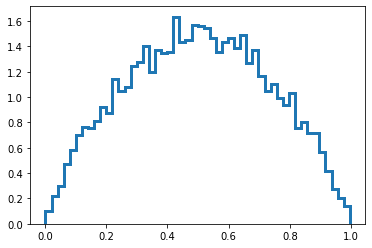

In [20]:
m1 =  20.0*np.random.rand(10000)
m2 =  20.0*np.random.rand(10000)
chi1 =  1.0*np.random.rand(10000)
chi2 =  1.0*np.random.rand(10000)
spin_mod = SpinModel(name_model="Aligned")
chieff = spin_mod.compute_chieff(m1=m1,m2=m2,chi1=chi1,chi2=chi2)
plt.hist(chieff,density=True,histtype="step",lw=3,bins=50)
print("Plotting")

If you don't have access to $\chi_{1}$ and $\chi_{2}$, then you have to generate it using the methods of the class. To do that, you can specify the fiducial model for the magnitude generator. So far So far only a Maxwellian is available in the code.

Example for "Aligned" case

Plotting


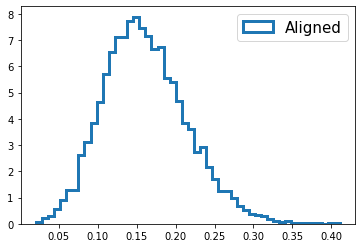

In [25]:
m1 =  20.0*np.random.rand(10000)
m2 =  20.0*np.random.rand(10000)
mag_gen_param = {"name_dist": "Maxwellian",
                 "parameters": {"sigma": 0.1}}
spin_mod = SpinModel(name_model="Aligned",mag_gen_param=mag_gen_param)
chieff = spin_mod.compute_chieff(m1=m1,m2=m2)
plt.hist(chieff,density=True,histtype="step",lw=3,bins=50, label="Aligned")
plt.legend(fontsize=15)
print("Plotting")

Example for "Isotropic" case

Plotting


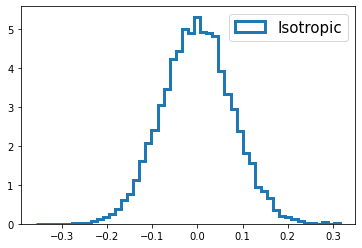

In [26]:
m1 =  20.0*np.random.rand(10000)
m2 =  20.0*np.random.rand(10000)
mag_gen_param = {"name_dist": "Maxwellian",
                 "parameters": {"sigma": 0.1}}
spin_mod = SpinModel(name_model="Isotropic",mag_gen_param=mag_gen_param)
chieff = spin_mod.compute_chieff(m1=m1,m2=m2)
plt.hist(chieff,density=True,histtype="step",lw=3,bins=50, label="Isotropic")
plt.legend(fontsize=15)
print("Plotting")

When using the model "Isolated_tilt", it is mandatory to provide values for cos_nu1 and cos_nu2 (cosine of tilts induced by first and second supernova). These are provided directly from CosmoRate (not generated fiducially).

If you or CosmoRate don't provide them, then selecting the model "Isolated_tilt" will throw an error when computing $\chi_{eff}$

In [15]:
m1 =  20.0*np.random.rand(10000)
m2 =  20.0*np.random.rand(10000)
mag_gen_param = {"name_dist": "Maxwellian",
                 "parameters": {"sigma": 0.1}}
spin_mod = SpinModel(name_model="Isolated_tilt",mag_gen_param=mag_gen_param)
chieff = spin_mod.compute_chieff(m1=m1,m2=m2)

ValueError: Values for cos_nu1 and cos_nu2 must be provided when using model Isolated_tilt.

Proper initialisation

Plotting


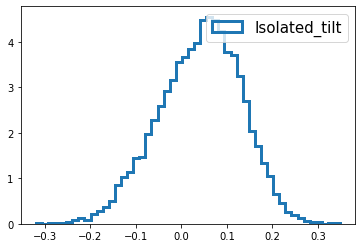

In [31]:
m1 =  20.0*np.random.rand(10000)
m2 =  20.0*np.random.rand(10000)
cos_nu1 = 1.0*np.random.rand(10000)
cos_nu2 =  1.0*np.random.rand(10000)
mag_gen_param = {"name_dist": "Maxwellian",
                 "parameters": {"sigma": 0.1}}
spin_mod = SpinModel(name_model="Isolated_tilt",mag_gen_param=mag_gen_param)
chieff = spin_mod.compute_chieff(m1=m1,m2=m2,cos_nu1=cos_nu1,cos_nu2=cos_nu2)
plt.hist(chieff,density=True,histtype="step",lw=3,bins=50, label="Isolated_tilt")
plt.legend(fontsize=15)
print("Plotting")

# AstroModel class

The AstroModel class contains a number of methods and features related to the compact object catalog created

In [2]:
astro_param = {"co_type": "BBH",
               "formation_channel": "Iso",
               "sigma_logmetallicity": 0.4,
               "mag_spin": 0.1,
               "alpha": 1.0,
               "sn_model": "delayed"}

# Compact object parameters
co_param = ["Mc", "q", "z", 'chieff']

# Setup the spin model
mag_gen_param = {"name_dist": "Maxwellian",
           "parameters": {"sigma": 0.1}}
spin_model = SpinModel(name_model="Isotropic",
                       mag_gen_param=mag_gen_param)

# Initialise the model
model_astro = AstroModel(astro_model_parameters=astro_param,
                         co_parameters=co_param,
                         spin_model=spin_model,
                         load_cat=True,
                         load_mrd=True)

The main attribute of the class is the catalog that is a dataframe containing all the sources created using CosmoRate sources.

In [7]:
model_astro.data_cat

Mc       q       z  chieff
0       14.0846  0.9223  0.0527  0.0143
1        5.1104  0.4264  0.0352 -0.0584
2       18.2797  0.7650  0.0699  0.0364
3       17.8950  0.8701  0.0551  0.0298
4        9.3212  0.5004  0.0485  0.0996
...         ...     ...     ...     ...
299995  16.8722  0.9238  1.9416 -0.0896
299996   4.3077  0.4190  1.9475  0.1211
299997  14.8853  0.8284  1.9750 -0.1466
299998  11.3137  0.7194  1.9650  0.0182
299999   7.8611  0.9388  1.9929 -0.0151

[300000 rows x 4 columns]

The data from the merger rate density are also loaded in another dataframe. You can find the merger rate density at source-frame (mrd_sf), the merger rate density at detector-frame (mrd_df) and the merger rate at detector-frame (mr_df)

In [10]:
model_astro.data_mrd

z    mrd_sf    mrd_df       mr_df
0   0.05   60.6691   57.7801    150.0742
1   0.15   72.3615   62.9230   1331.1064
2   0.25   85.3882   68.3106   3611.8510
3   0.35   99.9148   74.0109   6871.8250
4   0.45  115.6235   79.7404  10932.9624
5   0.55  132.4699   85.4644  15608.6393
6   0.65  150.6523   91.3044  20751.3720
7   0.75  169.4578   96.8331  26106.8325
8   0.85  189.6237  102.4993  31646.8657
9   0.95  210.2023  107.7961  37109.5909
10  1.05  231.6025  112.9768  42474.7214
11  1.15  252.7692  117.5671  47484.4912
12  1.25  273.5620  121.5831  52063.8426
13  1.35  293.5880  124.9310  56114.3650
14  1.45  311.4959  127.1412  59375.3173
15  1.55  328.3051  128.7471  62058.8525
16  1.65  342.2932  129.1673  63873.1412
17  1.75  354.2731  128.8266  65019.7189
18  1.85  363.7116  127.6181  65455.0183
19  1.95  370.7844  125.6896  65270.9644

The class also contains a number of graphical methods that can be used for inspection of the distribution.

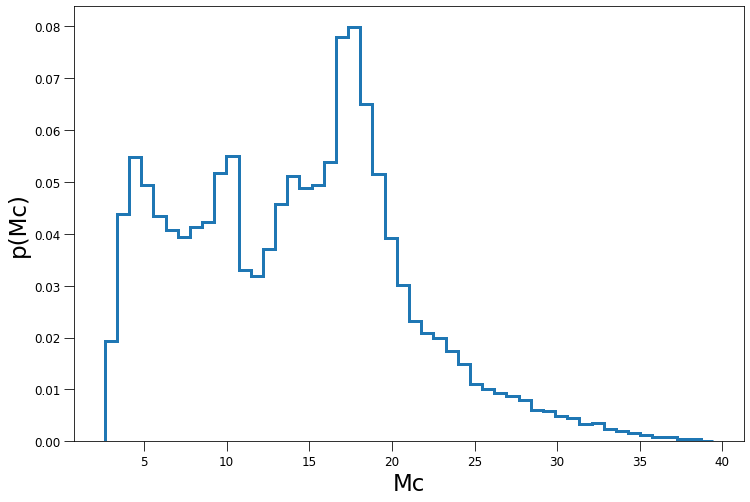

In [3]:
model_astro.hist(var="Mc")

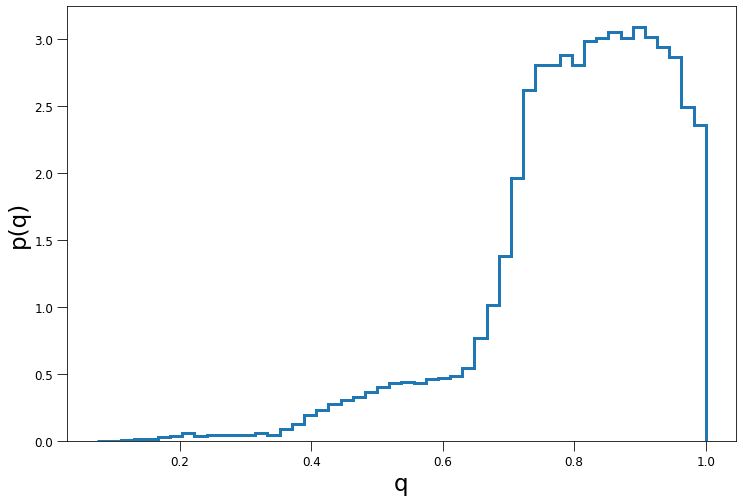

In [5]:
model_astro.hist(var="q")

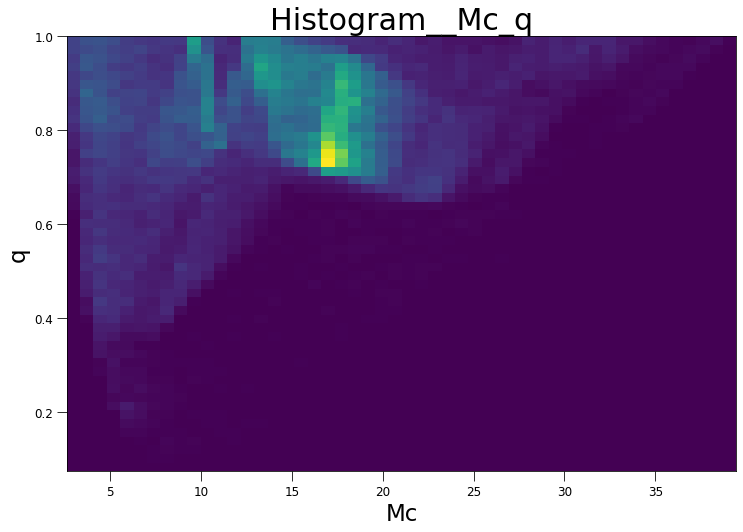

In [4]:
model_astro.hist(var=["Mc","q"])

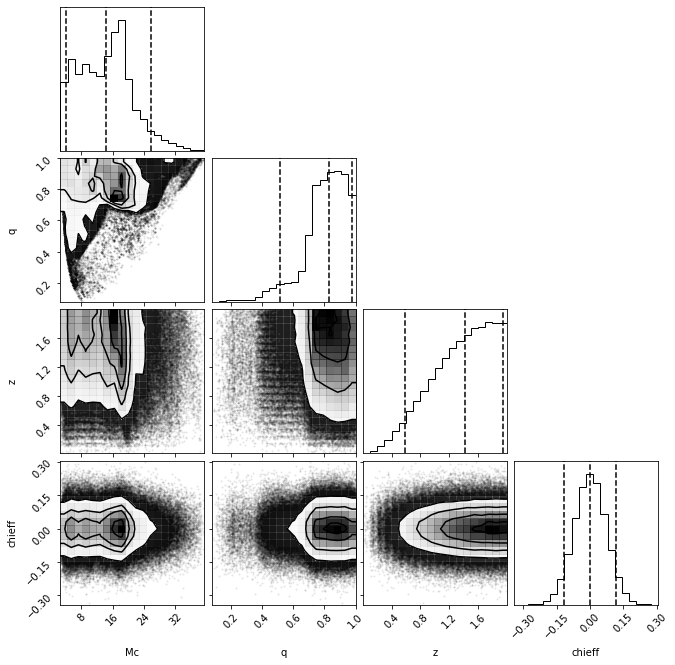

In [11]:
model_astro.corner()

You have also some routines that can be used to determine the number of sources for a given observation time in years.

In [9]:
model_astro.sources_in_tobs_time(tobs=1.0)

73331.15522

# GwEvent class

This class contains all the data relative to one given event observed by LIGO/Virgo. To create an instance of the class, you have to pass a name of the event (following the nomenclature of the LVC). You can choose to load only some variables (among the ones accessible).

You also need to set some loading flags for the posterior and prior. This will depend on the situation and what you need to do with the event.

In [20]:
gw_event_GW150914 = GwEvent(name_event="GW150914", event_par=["Mc","q","z","chieff"],
                            read_posterior=True, read_prior=True)

print("Date of the event : ", gw_event_GW150914.date_event)
print("Parameters used : ",gw_event_GW150914.event_par)

Date of the event :  2015-09-14
Parameters used :  ['Mc', 'q', 'z', 'chieff']


The event will contain dataframes that contain the values of the posterior/prior samples provided by the LVC.

In [21]:
gw_event_GW150914.data_post

Mc         q         z    chieff
0     29.870548  0.948951  0.108214  0.110566
1     27.593648  0.987415  0.085329 -0.088350
2     28.942426  0.896454  0.078866 -0.024738
3     28.992145  0.979993  0.082373 -0.019777
4     28.617265  0.801601  0.073896 -0.020407
...         ...       ...       ...       ...
8345  28.893950  0.888020  0.066090 -0.070598
8346  29.542471  0.969590  0.097493  0.059555
8347  29.333664  0.939433  0.094774  0.035118
8348  29.265116  0.703862  0.116737  0.121402
8349  28.539204  0.950902  0.108695  0.009698

[8350 rows x 4 columns]

In [22]:
gw_event_GW150914.data_prior

Mc         q         z    chieff
0      25.030189  0.380745  0.333202 -0.004636
1      40.795756  0.849068  0.338879 -0.023080
2      42.791725  0.732090  0.354109  0.074340
3      15.020896  0.470069  0.275990 -0.017255
4      36.580074  0.762594  0.266005 -0.313341
...          ...       ...       ...       ...
34388  27.102696  0.976582  0.349897 -0.354685
34389  20.206199  0.874908  0.369466 -0.151698
34390  18.349845  0.155726  0.273943 -0.021538
34391  40.325043  0.698847  0.324428 -0.048336
34392  35.213010  0.466830  0.149483 -0.038839

[34393 rows x 4 columns]

A number of graphical methods are also available to quickly look at the distribution of the event

You can plot the histogram for a given variable

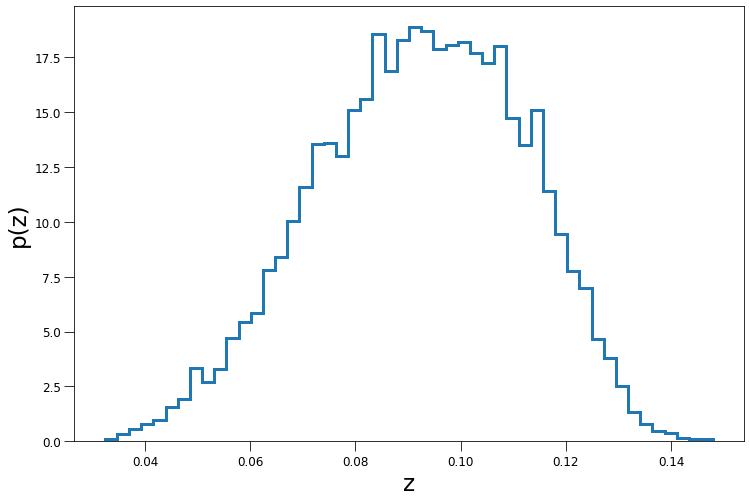

In [23]:
gw_event_GW150914.hist("z")

You can also get the axes returned so that you can put it in input for subplots.

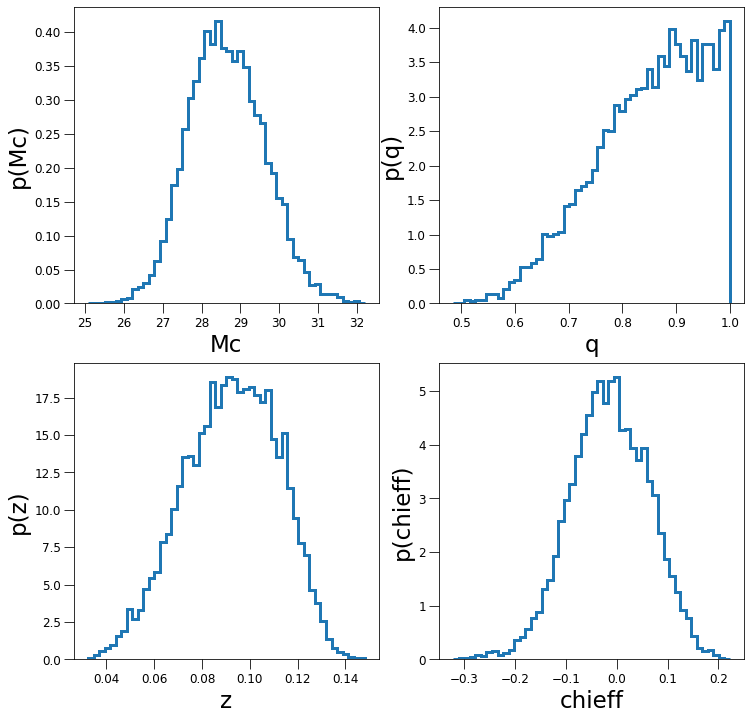

In [24]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

gw_event_GW150914.hist("Mc", ax =axes[0,0], show=False)
gw_event_GW150914.hist("q", ax =axes[0,1], show=False)
gw_event_GW150914.hist("z", ax =axes[1,0], show=False)
gw_event_GW150914.hist("chieff", ax =axes[1,1], show=False)

By default, the routine plot the posterior samples. But you can have access to the prior by setting the flag to True.

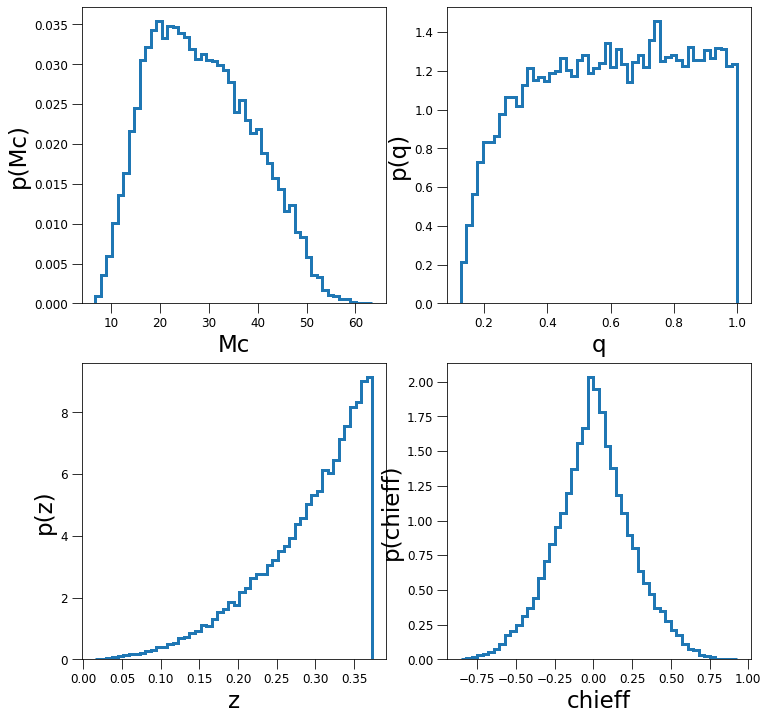

In [26]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

gw_event_GW150914.hist("Mc", ax =axes[0,0], show=False, prior=True)
gw_event_GW150914.hist("q", ax =axes[0,1], show=False, prior=True)
gw_event_GW150914.hist("z", ax =axes[1,0], show=False, prior=True)
gw_event_GW150914.hist("chieff", ax =axes[1,1], show=False, prior=True)

# Observing Runs

The observing run object is a collection of GwEvent that follow the specifications of the observing runs of the LVC

In [28]:
O1_run = ObservingRun(name_obs_run="O1", read_data_posterior=True)
print(O1_run)

*****************************
Summary for observing run O1
*****************************

3 BBHs detected, 0 BNSs detected, 0 BHNSs detected

List of BBHs : 
['GW150914', 'GW151012', 'GW151226']
List of BNSs : 
[]
List of BHNSs : 
[]



The main parameter is the dictionary gw_events that have for keys the type of compact object, and for value a dictionary containing the name (keys) and GwEvent object (values).

In [29]:
O1_run.gw_events

{'BBH': {'GW150914': <Project_Modules.gw_event.GwEvent at 0x7fcb7ae337c0>,
  'GW151012': <Project_Modules.gw_event.GwEvent at 0x7fcb63af3d30>,
  'GW151226': <Project_Modules.gw_event.GwEvent at 0x7fcb641a8e20>},
 'BNS': {},
 'BHNS': {}}

By default the ObservingRun object will read all the detections done during a run from a file in auxiliary_files. But it is possible to only have access to sub-samples of the events

For example, there is for now no posterior data for the BNSs. Thus if you try to load O2 with all the events, you will get an error.

In [32]:
O2_run = ObservingRun(name_obs_run="O2", read_data_posterior=True)

FileNotFoundError: File for posterior data not found at auxiliary_files/LVC_data/Posterior/GW170817_post.dat

But you can then use the option "co_only" to only select one type of compact object

In [33]:
O2_run = ObservingRun(name_obs_run="O2", read_data_posterior=True, co_only="BBH")
print(O2_run)

*****************************
Summary for observing run O2
*****************************

7 BBHs detected, 0 BNSs detected, 0 BHNSs detected

List of BBHs : 
['GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170818', 'GW170823']
List of BNSs : 
[]
List of BHNSs : 
[]
The following events have been removed from original LVC catalogs.
List of removed BBHs : 
[]
List of removed BNSs : 
['GW170817']
List of removed BHNSs : 
[]



Similarly, you can also only select a sub-sample of BBH by using events_to_keep_only option. 

In [34]:
events_to_keep_only = {"BBH":['GW190521', 'GW190602_175927', 'GW190519_153544',
       'GW190706_222641', 'GW190701_203306', 'GW190620_030421','GW190929_012149', 
                              'GW190910_112807','GW190521_074359']}
O3a_run = ObservingRun(name_obs_run="O3a", read_data_posterior=True, 
                       events_to_keep_only=events_to_keep_only,co_only="BBH")
print(O3a_run)

*****************************
Summary for observing run O3a
*****************************

9 BBHs detected, 0 BNSs detected, 0 BHNSs detected

List of BBHs : 
['GW190519_153544', 'GW190521', 'GW190521_074359', 'GW190602_175927', 'GW190620_030421', 'GW190701_203306', 'GW190706_222641', 'GW190910_112807', 'GW190929_012149']
List of BNSs : 
[]
List of BHNSs : 
[]
The following events have been removed from original LVC catalogs.
List of removed BBHs : 
['GW190408_181802', 'GW190412', 'GW190413_052954', 'GW190413_134308', 'GW190421_213856', 'GW190424_180648', 'GW190503_185404', 'GW190512_180714', 'GW190513_205428', 'GW190514_065416', 'GW190517_055101', 'GW190527_092055', 'GW190630_185205', 'GW190707_093326', 'GW190708_232457', 'GW190720_000836', 'GW190727_060333', 'GW190728_064510', 'GW190731_140936', 'GW190803_022701', 'GW190814', 'GW190828_063405', 'GW190828_065509', 'GW190915_235702', 'GW190924_021846', 'GW190930_133541']
List of removed BNSs : 
['GW190425']
List of removed BHNSs : 
[]


A number of graphical optiosn are available to quickly scout the distributions of a collection of events

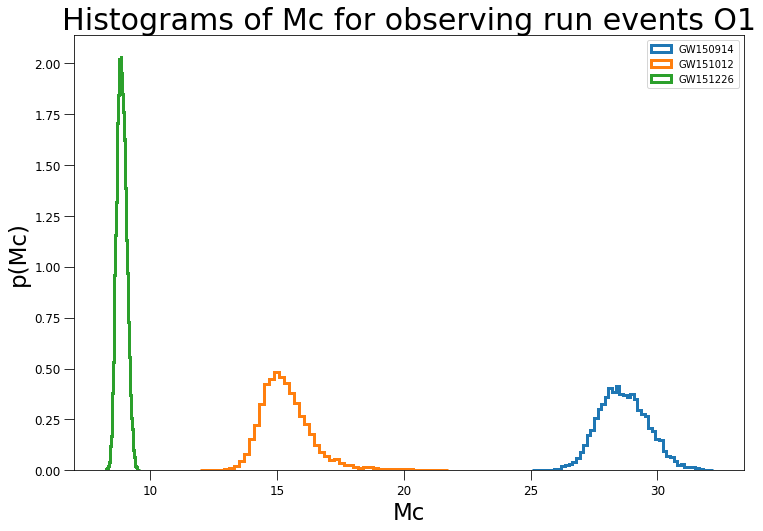

In [30]:
O1_run.hist_all(var="Mc",co_type="BBH")

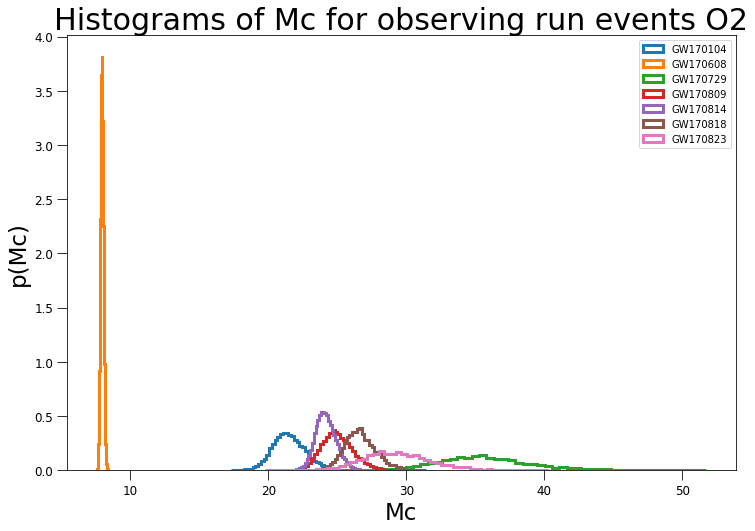

In [26]:
O2_run.hist_all(var="Mc",co_type="BBH")

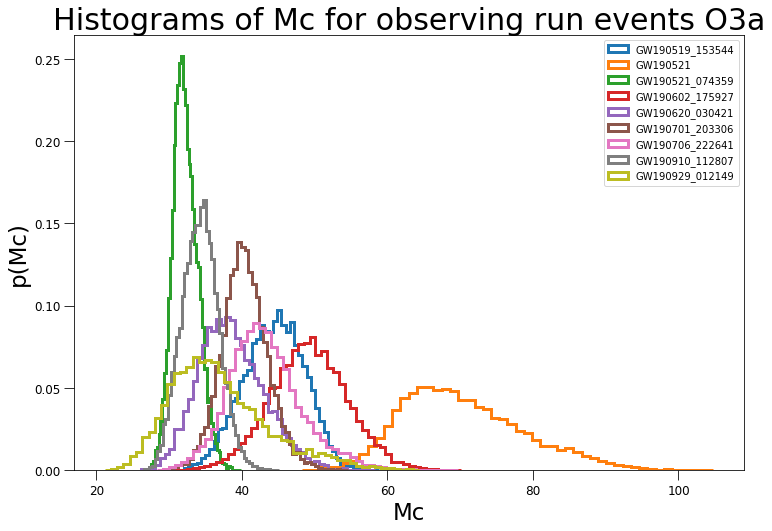

In [6]:
O3a_run.hist_all(var="Mc",co_type="BBH")

# GWDetector

The main goal of this class is to contain the values for the noiwer power spectral density of the detector chosen for the analysis.
It is possible to either load from data files in auxiliary_files or given model from PyCBC.

In [47]:
detector_O2 = DetectorGW("Livingston_O2",low_freq=20.0, high_freq=1023.75)
detector_LIGO_design = DetectorGW("LIGO_Design",low_freq=20.0, high_freq=1023.75)

The data of the PSD are then contained in the psd_data object that is an object from PyCBC

In [53]:
print(type(detector_O2.psd_data))
print(detector_O2.psd_data)

<class 'pycbc.types.frequencyseries.FrequencySeries'>
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.08072998e-43
 9.97343989e-44 9.13957996e-44]


It is also possible to quickly plot the psd with plot_psd

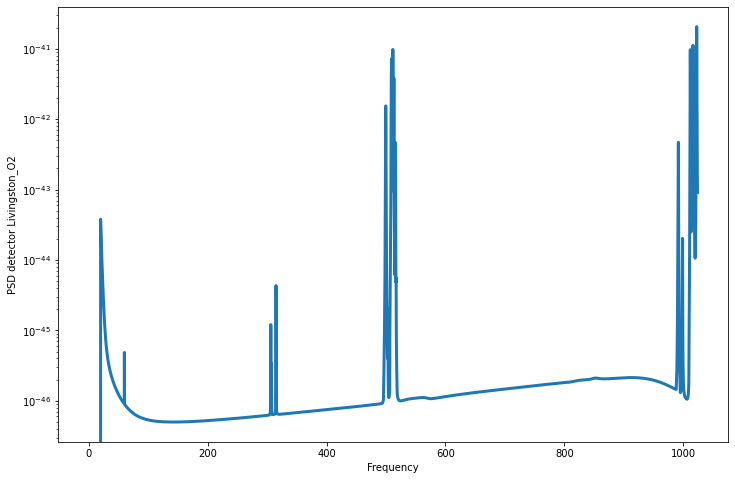

In [54]:
detector_O2.plot_psd()

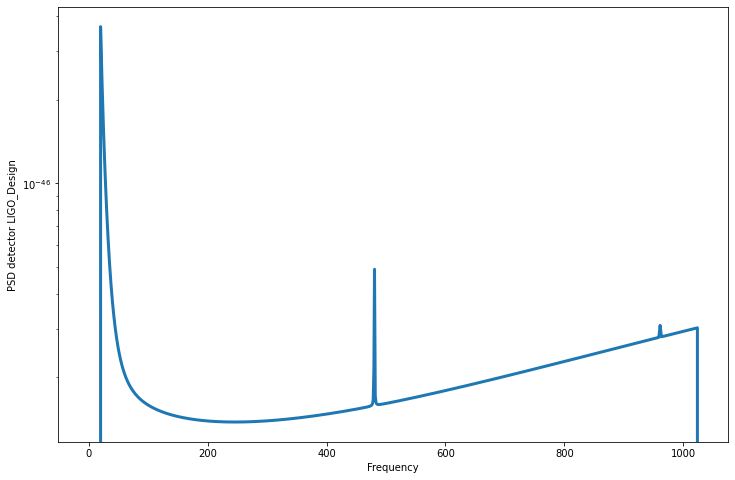

In [55]:
detector_LIGO_design.plot_psd()

A number of options are available for the frequencies range and frequency interval

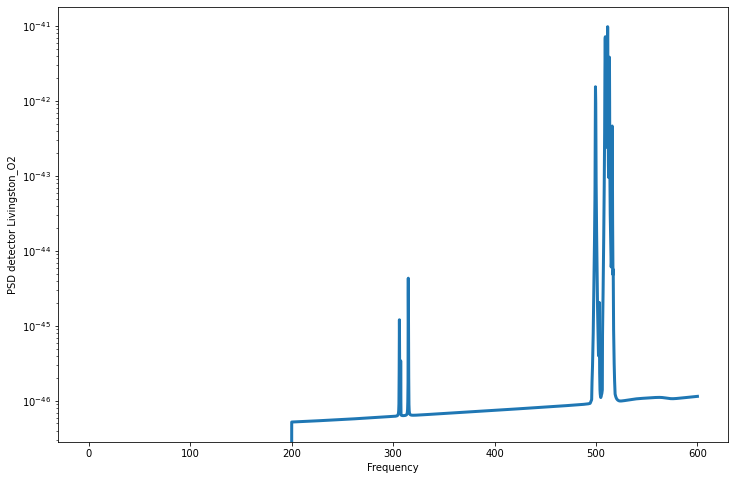

In [56]:
detector_O2_modif = DetectorGW("Livingston_O2",low_freq=200.0, high_freq=600.0)
detector_O2_modif.plot_psd()

# BayesModel class

The main goal of the BayesModel class is to have access 

In [58]:
# List of hyperparameters used
co = "BBH"
fc = "Iso"
sigma_met = 0.4
alpha = 1.0
sigma_spin = 0.1
sn_model = "delayed"

# Astrophysical model parameters (hyperparameters)
astro_param = {"co_type": co,
               "formation_channel": fc,
               "sigma_logmetallicity": sigma_met,
               "mag_spin": sigma_spin,
               "alpha": alpha,
               "sn_model": sn_model}

# Compact object parameters
co_param = ["Mc", "q", "z", 'chieff']

# Setup the spin model
mag_gen_param = {"name_dist": "Maxwellian",
                 "parameters": {"sigma": 0.1}}
spin_model = SpinModel(name_model="Isotropic",
                       mag_gen_param=mag_gen_param)

# Initialise the model
astro_model = AstroModel(astro_model_parameters=astro_param,
                         co_parameters=co_param,
                         spin_model=spin_model,
                         load_cat=False,
                         load_mrd=True)

# Initialise observing run
observing_run = ObservingRun("O1", read_data_posterior=False, read_data_prior=False)

# Initialise detector
detector = DetectorGW("Livingston_O1")

# Initialise Bayesian model
bayes_model = BayesModel(astro_model=astro_model,
                         observing_run=observing_run,
                         detector=detector,
                         read_match=True, read_eff=True)

The match of the model are contained in a dictionary 

In [59]:
bayes_model.match_model

{'GW150914': 0.0888124699373309,
 'GW151012': 0.4970876255367161,
 'GW151226': 0.0022097338907357644}

The efficiency is just a number

In [61]:
print(bayes_model.efficiency)

0.00031036022595973083


You can also have access to information on number of sources and number of detected sources

In [63]:
bayes_model.n_sources

9760.376759782

In [64]:
bayes_model.n_det

3.029232736618047